In [261]:
from plotly.express import scatter
from scipy.spatial import distance_matrix
# %matplotlib widget
# %matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from umap import UMAP
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import json

# Загрузка датасета

In [262]:
names = ['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm',
         'Spleen Palpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime',
         'Histology']
with open('../config.json') as file:
    file_data = json.load(file)
hepatitis_data_path = file_data['hepatitis_data_path']
print(hepatitis_data_path)
hepatitis = pd.read_csv(hepatitis_data_path, header=None, names=names)
# hepatitis = pd.read_csv(r'D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\lab_3_4\datasets\hepatitis\hepatitis.data', header = None, names = names)
hepatitis.keys()

D:\Artem\Magistrature\1_sem\intellg_systems_and_techno\labs\lab_3_4\datasets\hepatitis\hepatitis.data


Index(['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise',
       'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
       'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin',
       'Protime', 'Histology'],
      dtype='object')

In [263]:
hepatitis

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


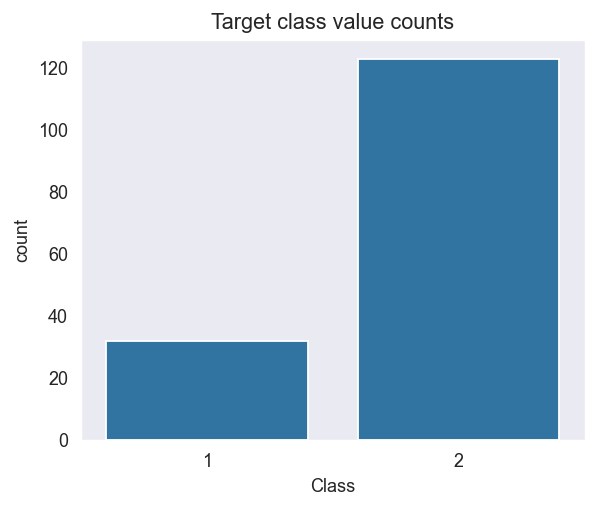

Class
2    123
1     32
Name: count, dtype: int64


In [264]:
hepatitis
plt.figure(figsize=(5, 4), dpi=130)
plt.grid()
sns.countplot(x=hepatitis['Class'])
plt.title("Target class value counts")
plt.show()
# plt.close()
print(hepatitis['Class'].value_counts())

In [265]:
plt.close()
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   Age              155 non-null    int64 
 2   Sex              155 non-null    int64 
 3   Steroid          155 non-null    object
 4   Antivirals       155 non-null    int64 
 5   Fatigue          155 non-null    object
 6   Malaise          155 non-null    object
 7   Anorexia         155 non-null    object
 8   Liver Big        155 non-null    object
 9   Liver Firm       155 non-null    object
 10  Spleen Palpable  155 non-null    object
 11  Spiders          155 non-null    object
 12  Ascites          155 non-null    object
 13  Varices          155 non-null    object
 14  Bilirubin        155 non-null    object
 15  Alk Phosphate    155 non-null    object
 16  Sgot             155 non-null    object
 17  Albumin          155 non-null    ob

In [266]:
hepatitis.describe()

,Class,Age,Sex,Antivirals,Histology
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


# Замена пропущенных значений средними

In [267]:
Bilirubin = hepatitis['Bilirubin']
bilirubin_mean = round(Bilirubin[Bilirubin != '?'].astype(float).mean(), 2)
print('Bilirubin mean = ', bilirubin_mean)

Alk_Phosphate = hepatitis['Alk Phosphate']
Alk_Phosphate_mean = Alk_Phosphate[Alk_Phosphate != '?'].astype(int).mean().astype(int)
print('Alk_Phosphate mean = ', Alk_Phosphate_mean)

Sgot = hepatitis['Sgot']
Sgot_mean = Sgot[Sgot != '?'].astype(int).mean().astype(int)
print('Sgot mean = ', Sgot_mean)

Albumin = hepatitis['Albumin']
Albumin_mean = round(Albumin[Albumin != '?'].astype(float).mean(), 1)
print('Albumin mean = ', Albumin_mean)

Protime = hepatitis['Protime']
Protime_mean = Protime[Protime != '?'].astype(int).mean().astype(int)
print('Protime mean = ', Protime_mean)

hepatitis = hepatitis.replace(
    {'Steroid': {'?': 3}, 'Fatigue': {'?': 3}, 'Malaise': {'?': 3}, 'Anorexia': {'?': 3}, 'Liver Big': {'?': 3},
     'Liver Firm': {'?': 3}, 'Spleen Palpable': {'?': 3}, 'Spiders': {'?': 3}, 'Ascites': {'?': 3}, 'Varices': {'?': 3},
     'Bilirubin': {'?': bilirubin_mean}, 'Alk Phosphate': {'?': Alk_Phosphate_mean}, 'Sgot': {'?': Sgot_mean},
     'Albumin': {'?': Albumin_mean}, 'Protime': {'?': Protime_mean}})
hepatitis

Bilirubin mean =  1.43
Alk_Phosphate mean =  105
Sgot mean =  85
Albumin mean =  3.8
Protime mean =  61


,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,61,1
3,2,31,1,3,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,200,4.0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,105,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,61,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,61,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [268]:
for column in hepatitis.columns:
    if column not in ['Bilirubin', 'Albumin']:
        hepatitis[column] = hepatitis[column].astype('int')
    else:
        hepatitis[column] = hepatitis[column].astype('float')
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          155 non-null    int64  
 4   Antivirals       155 non-null    int64  
 5   Fatigue          155 non-null    int64  
 6   Malaise          155 non-null    int64  
 7   Anorexia         155 non-null    int64  
 8   Liver Big        155 non-null    int64  
 9   Liver Firm       155 non-null    int64  
 10  Spleen Palpable  155 non-null    int64  
 11  Spiders          155 non-null    int64  
 12  Ascites          155 non-null    int64  
 13  Varices          155 non-null    int64  
 14  Bilirubin        155 non-null    float64
 15  Alk Phosphate    155 non-null    int64  
 16  Sgot             155 non-null    int64  
 17  Albumin         

In [269]:
hepatitis

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,31,1,3,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,105,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,61,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


# Фичи и таргет

In [270]:
hepatitis_features = hepatitis.iloc[:, 1:]
hepatitis_targets = hepatitis.iloc[:, 0]
X = hepatitis.iloc[:, 1:]  # hepatitis_features
y = hepatitis.iloc[:, 0]  # hepatitis_targets

In [271]:
y

0      2
1      2
2      2
3      2
4      2
      ..
150    1
151    2
152    2
153    2
154    1
Name: Class, Length: 155, dtype: int64

# Кластеризация

In [272]:
X_scaled = MaxAbsScaler().fit_transform(X)
# X_scaled = X

In [273]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [274]:
# расчёт матрицы связей
distance_matrix = linkage(X_scaled, method='ward', metric='euclidean')
#методы расчёты расстояний - 'ward', 'single','complete', 'average
distance_matrix

array([[3.40000000e+01, 5.40000000e+01, 7.92494389e-02, 2.00000000e+00],
       [6.50000000e+01, 7.00000000e+01, 8.83432231e-02, 2.00000000e+00],
       [9.00000000e+00, 4.40000000e+01, 9.22825125e-02, 2.00000000e+00],
       [7.90000000e+01, 1.56000000e+02, 1.28906460e-01, 3.00000000e+00],
       [2.20000000e+01, 6.10000000e+01, 1.39649841e-01, 2.00000000e+00],
       [7.00000000e+00, 1.57000000e+02, 1.40800167e-01, 3.00000000e+00],
       [5.00000000e+00, 5.10000000e+01, 1.58640788e-01, 2.00000000e+00],
       [3.80000000e+01, 8.20000000e+01, 1.68370441e-01, 2.00000000e+00],
       [2.00000000e+00, 1.60000000e+01, 1.76737288e-01, 2.00000000e+00],
       [1.01000000e+02, 1.49000000e+02, 1.89788456e-01, 2.00000000e+00],
       [2.30000000e+01, 4.20000000e+01, 1.91194829e-01, 2.00000000e+00],
       [4.00000000e+00, 5.20000000e+01, 1.96046184e-01, 2.00000000e+00],
       [1.00000000e+01, 1.90000000e+01, 2.45786238e-01, 2.00000000e+00],
       [9.30000000e+01, 1.14000000e+02, 2.51916329e

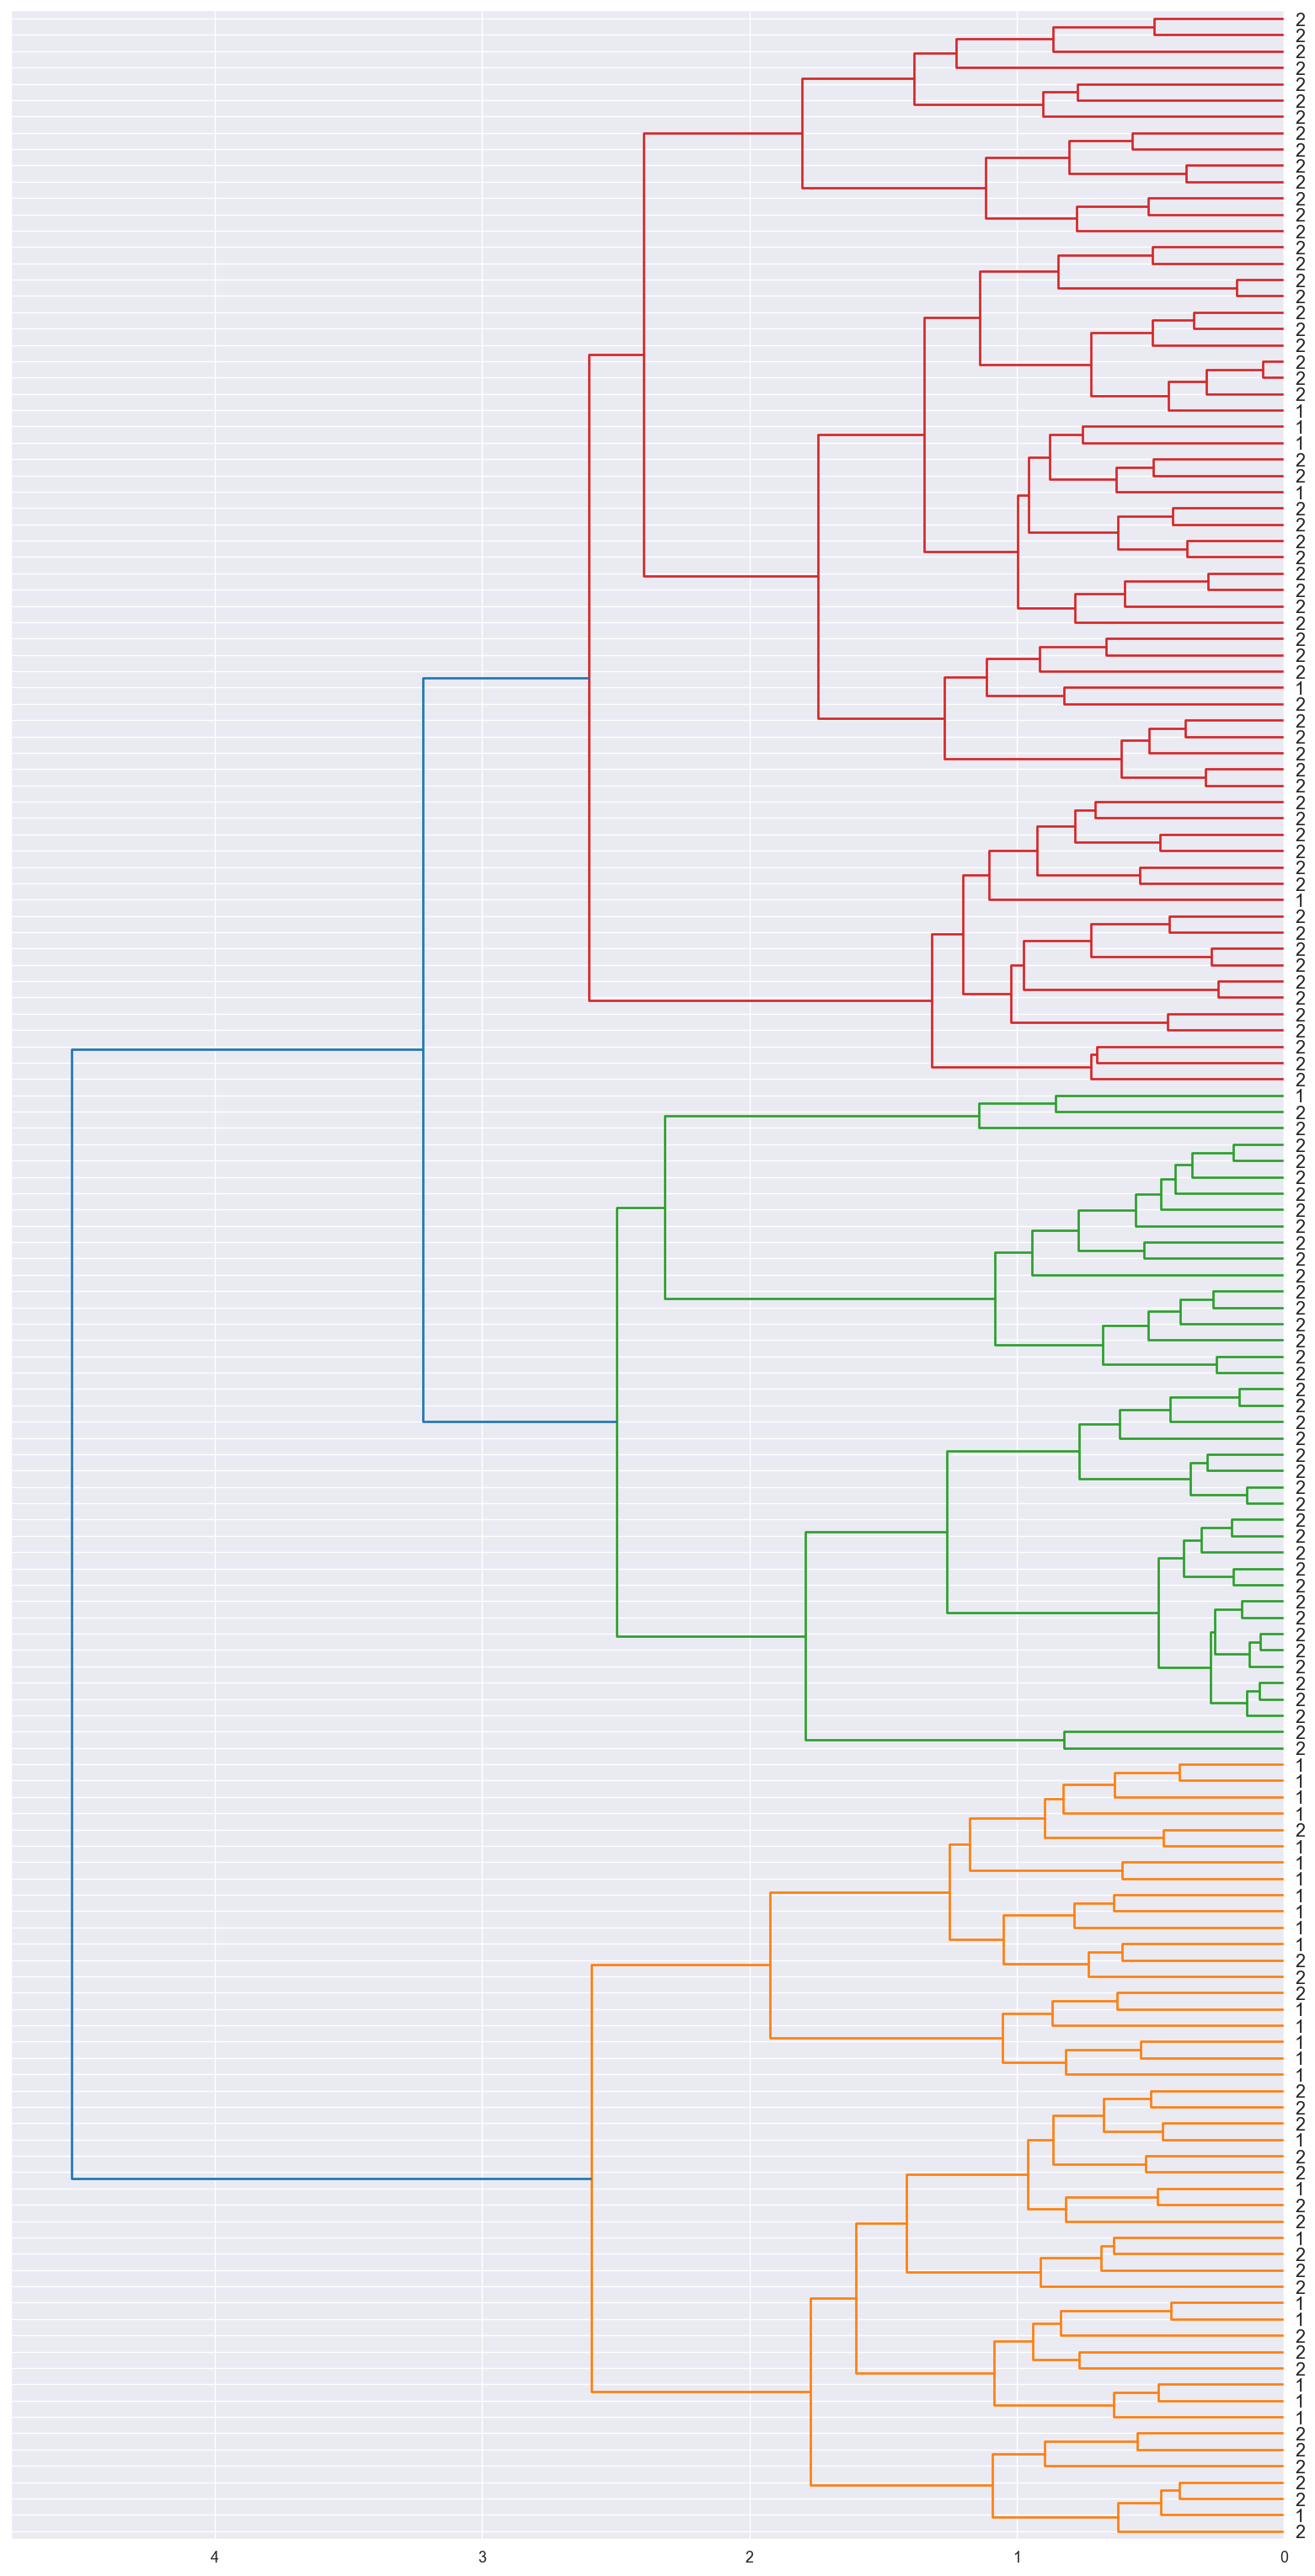

In [275]:
fig = plt.figure(figsize=(15, 30), dpi=130)
fig.patch.set_facecolor('white')
# построение дендрограммы
# разные цвета - разнвые автоматически определённые кластеры
R = dendrogram(distance_matrix, labels=[i for i in y], orientation='left', leaf_font_size=12)
plt.show()

Дендрограмма с методом вычисления расстоняий `ward` без масштабирования данных автоматически разбивает датасет на 3 кластера - 
1) с преобладанием объектов 2-го класса и малым кол-вом 1-го
2) только объекты 2-го класса
3) с преобладание объектов 1-го класса и немалым кол-вом объектов 2-го класса

In [276]:
# назначение меток кластеров
df = pd.DataFrame()
df['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
df['target'] = y

In [277]:
scaled_data = MinMaxScaler().fit_transform(X)
umap_kwargs = {'n_components': 2, 'n_neighbors': 25,
               'min_dist': 0.3,
               'metric': 'correlation'}
X_reduced = UMAP(**umap_kwargs).fit_transform(scaled_data)
X_2_scaled = X_reduced
# scaled_data = MaxAbsScaler().fit_transform(X_reduced)
# scaled_data = MinMaxScaler().fit_transform(X_reduced)
# scaled_data = X


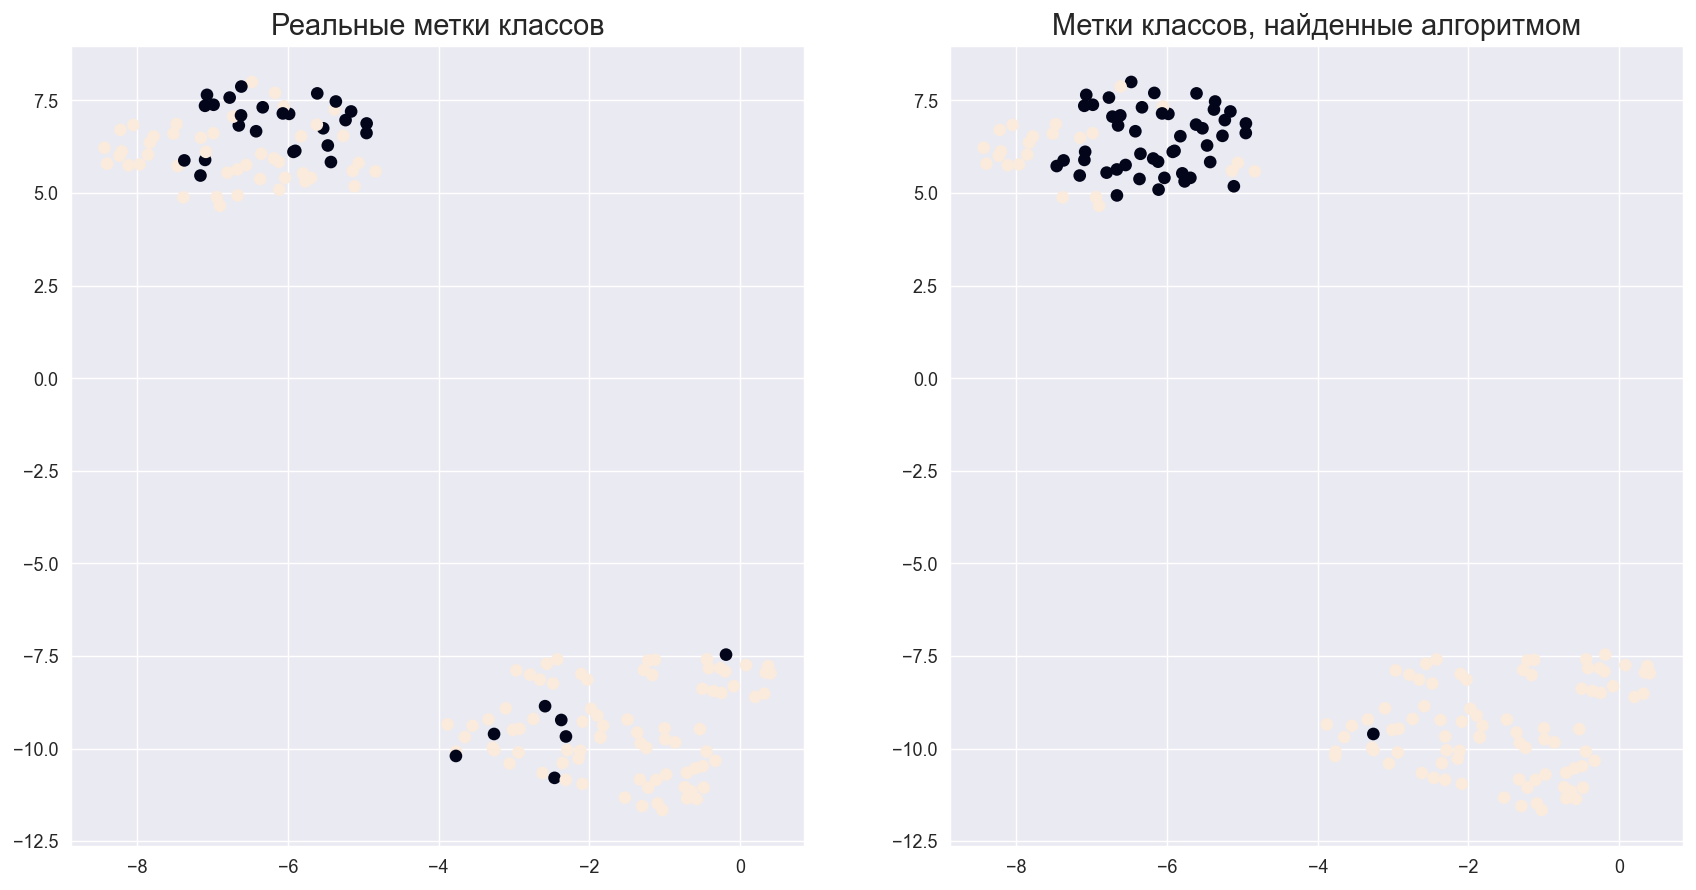

In [278]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi=130)

# axes[0].scatter(scaled_data['Age'], scaled_data['Sex'], c=df['target'])
axes[0].scatter(X_2_scaled[:, 0], X_2_scaled[:, 1], c=df['target'])
# axes[1].scatter(scaled_data['Age'], scaled_data['Sex'], c=df['cluster_labels'])
axes[1].scatter(X_2_scaled[:, 0], X_2_scaled[:, 1], c=df['cluster_labels'])
axes[0].set_title('Реальные метки классов', fontsize=16)
axes[1].set_title('Метки классов, найденные алгоритмом', fontsize=16)
plt.show()

# Применение алгоритма k-means

In [279]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Расчёт показателей WCSS и Silh при разном числе кластеров
WCSS = []
Silh = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    df['cluster_labels'] = kmeans.fit_predict(scaled_data)
    WCSS.append(kmeans.inertia_)
    Silh.append(silhouette_score(scaled_data, df['cluster_labels'], metric='euclidean'))


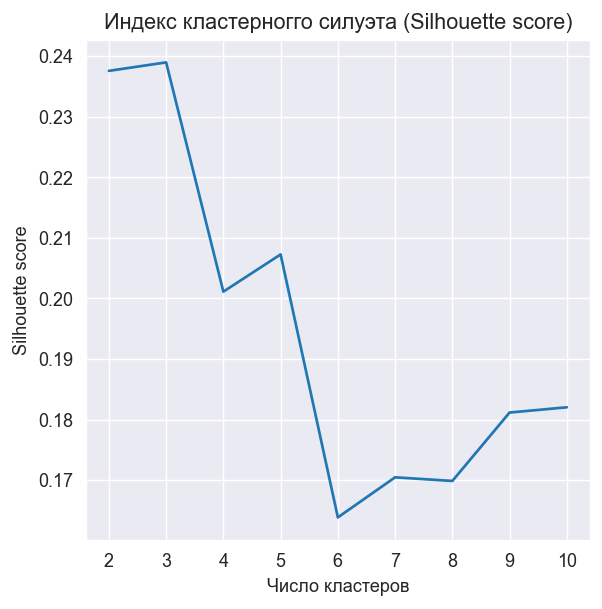

In [280]:
# построение графической зависимости для silhouette_score
fig = plt.figure(figsize=(5, 5), dpi=130)
plt.plot(range(2, 11), Silh)
plt.title("Индекс кластерногго силуэта (Silhouette score)")
plt.xlabel("Число кластеров")
plt.ylabel("Silhouette score")
plt.show()

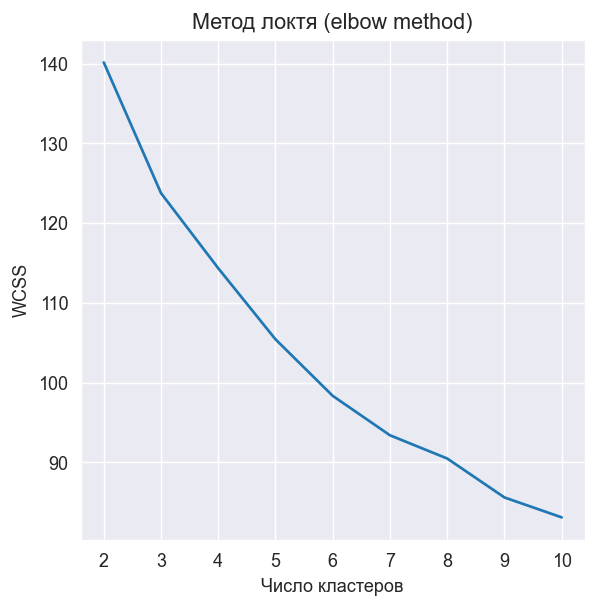

In [281]:
plt.close()
fig = plt.figure(figsize=(5, 5), dpi=130)
plt.plot(range(2, 11), WCSS)
plt.title("Метод локтя (elbow method)")
plt.xlabel("Число кластеров")
plt.ylabel("WCSS")
plt.show()

In [289]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)
df['cluster_labels'] = kmeans.fit_predict(X_scaled)
plt.close()

In [290]:

# Вывод центроидов кластеров
print(kmeans.cluster_centers_)
cluster_centers_scaled = MinMaxScaler().fit_transform(kmeans.cluster_centers_)
data_with_cluster_centers = X_scaled.copy()
data_with_cluster_centers = pd.DataFrame(data_with_cluster_centers)
data_with_cluster_centers = pd.concat([data_with_cluster_centers, pd.DataFrame(cluster_centers_scaled)])
data_2_with_cluster_centers = UMAP(**umap_kwargs).fit_transform(data_with_cluster_centers)
# dir(data_with_cluster_centers)
# data_with_cluster_centers.add(pd.DataFrame(cluster_centers_scaled))


[[0.48995984 0.55421687 0.52208835 0.87951807 0.5060241  0.58232932
  0.62650602 0.65461847 0.6064257  0.65461847 0.65461847 0.67871486
  0.68273092 0.12713855 0.30083725 0.10914026 0.63573042 0.66662651
  0.53614458]
 [0.57229345 0.54861111 0.48611111 0.97222222 0.39351852 0.48611111
  0.56944444 0.61111111 0.50925926 0.56481481 0.46759259 0.58333333
  0.58796296 0.23760417 0.42137476 0.15946502 0.55056424 0.55513889
  0.94444444]]


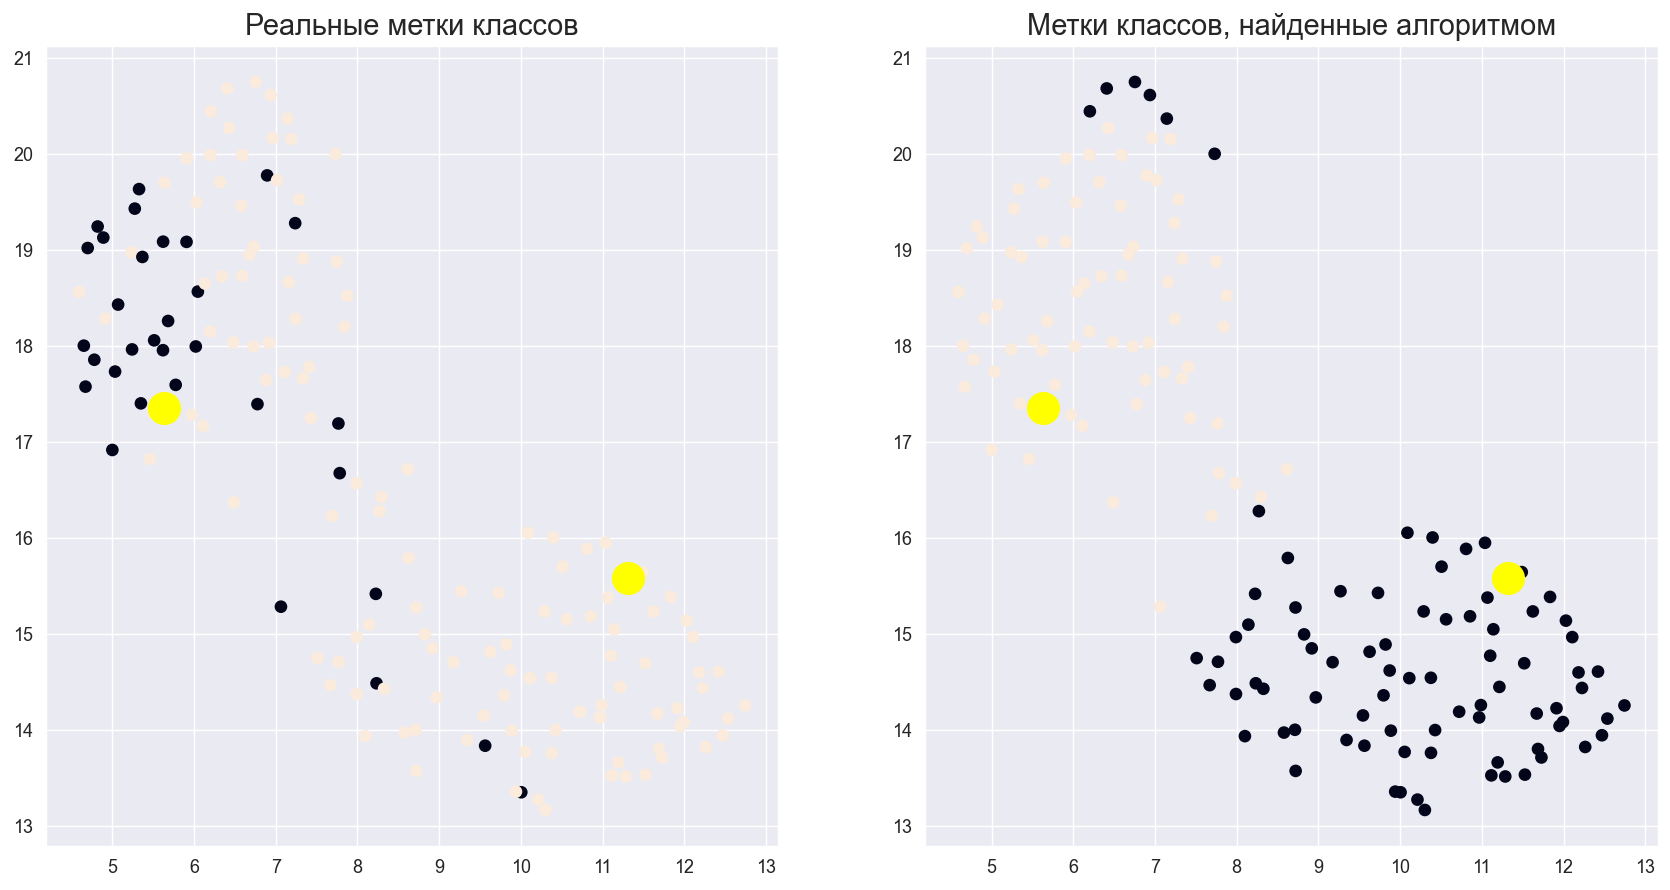

In [294]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi=130)
axes[0].scatter(data_2_with_cluster_centers[:-2, 0], data_2_with_cluster_centers[:-2, 1], c=df['target'])
axes[0].scatter(data_2_with_cluster_centers[-2:,0], data_2_with_cluster_centers[-2:,1], s=300, c='yellow', label='Centorids')
axes[0].set_title('Реальные метки классов', fontsize=16)

axes[1].scatter(data_2_with_cluster_centers[:-2, 0], data_2_with_cluster_centers[:-2, 1], c=df['cluster_labels'])
# Вывод центроидов кластеров
axes[1].scatter(data_2_with_cluster_centers[-2:,0], data_2_with_cluster_centers[-2:,1], s=300, c='yellow', label='Centorids')
axes[1].set_title('Метки классов, найденные алгоритмом', fontsize=16)
plt.show()

# fuzzy-c-means-алгоритм

In [295]:
from fuzzycmeans import FCM

In [310]:
X

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,31,1,3,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,105,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,61,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


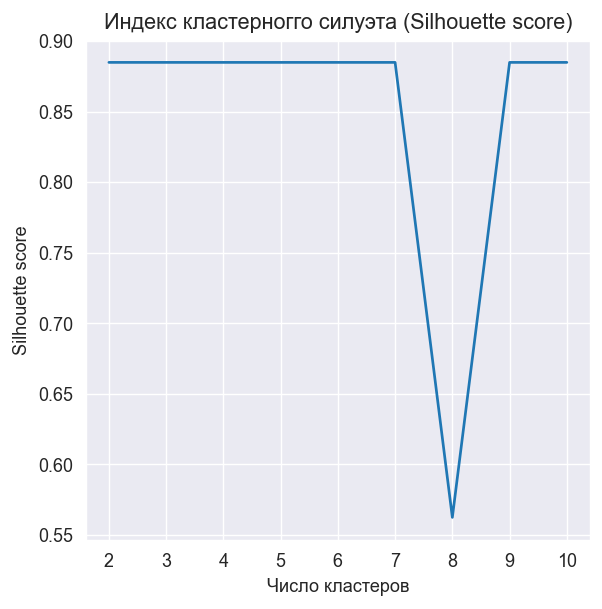

In [380]:

Silh = []
for i in range(2,11):
    fcm = FCM(n_clusters=i, max_iter=1)
    fcm.fit(X_2_scaled)
    df['cluster_labels'] = fcm.predict(np.array(X_2_scaled)).argmax(axis=1)
    Silh.append(silhouette_score(X_2_scaled[:,:], df['cluster_labels'], metric='euclidean'))
fig = plt.figure(figsize=(5, 5), dpi=130)
plt.plot(range(2, 11), Silh)
plt.title("Индекс кластерногго силуэта (Silhouette score)")
plt.xlabel("Число кластеров")
plt.ylabel("Silhouette score")
plt.show()

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([ 46.59375 ,   1.      ,   1.375   ,   1.9375  ,   1.0625  ,
         1.28125 ,   1.6875  ,   2.0625  ,   1.75    ,   1.65625 ,
         1.34375 ,   1.59375 ,   1.6875  ,   2.47375 , 118.03125 ,
        98.90625 ,   3.253125,  51.15625 ,   1.78125 ])]


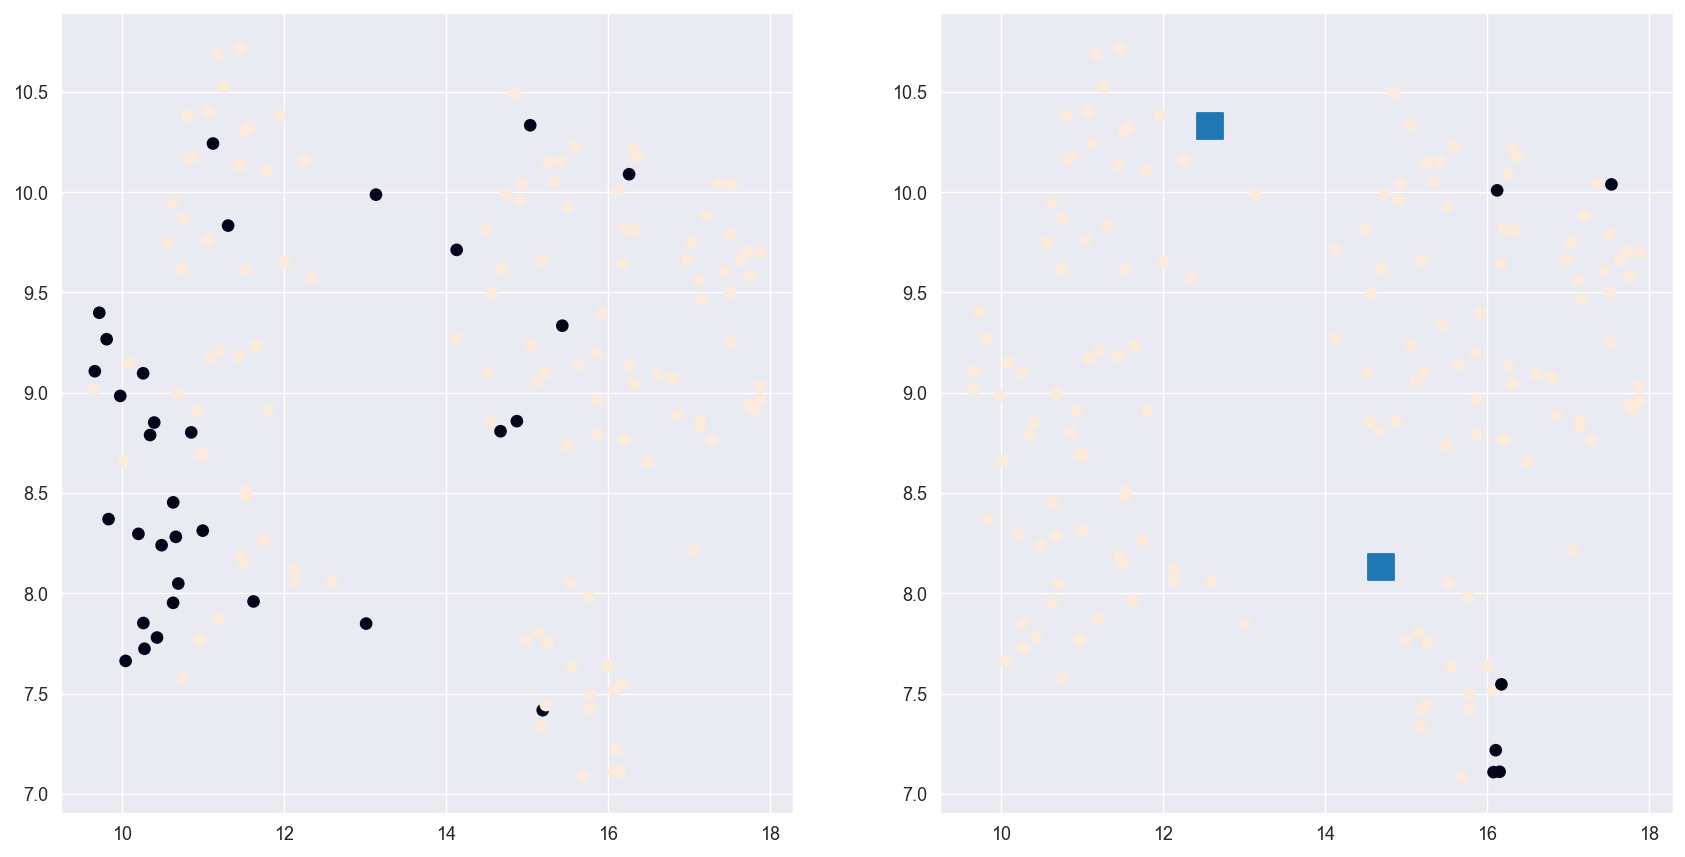

In [398]:
fcm = FCM(n_clusters=2, m = 2, max_iter=1)
fcm.fit(X,y)
df['cluster_labels'] = fcm.predict(np.array(X)).argmax(axis=1)
# outputs
fcm_centers = fcm.cluster_centers_
cluster_centers_scaled = MinMaxScaler().fit_transform(fcm_centers)
data_with_cluster_centers = X_scaled.copy()
data_with_cluster_centers = pd.DataFrame(data_with_cluster_centers)
data_with_cluster_centers = pd.concat([data_with_cluster_centers, pd.DataFrame(cluster_centers_scaled)])
data_2_with_cluster_centers = UMAP().fit_transform(data_with_cluster_centers)

print(fcm_centers)
fcm_labels  = fcm.u.argmax(axis=1)
# plot result
plt.close()
fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi=130)
axes[0].scatter(data_2_with_cluster_centers[:-2,0], data_2_with_cluster_centers[:-2,1],c=df['target'])
axes[1].scatter(data_2_with_cluster_centers[:-2,0], data_2_with_cluster_centers[:-2,1], c = df['cluster_labels'])
axes[1].scatter(data_2_with_cluster_centers[-2:,0], data_2_with_cluster_centers[-2:,1],marker="s",s=200)
plt.show()

# DBSCAN-алгоритм

In [399]:
#кол-во признаков в наборе - 19
from math import sqrt

In [426]:
# рассчёт расстояния для кажого объекта до его k-го ближайшего соседа
def calucate_kn_distance(X,k):
    kn_distance = []
    for i in range(len(X)):
        euc_dist = []
        for j in range(len(X)):
            euc_dist.append(sqrt((X[i,0]-X[j,0])**2+(X[i,1]-X[j,1])**2))
        euc_dist.sort()    
        kn_distance.append(euc_dist[k])    
    return kn_distance

In [427]:
len(X_2_scaled)

155

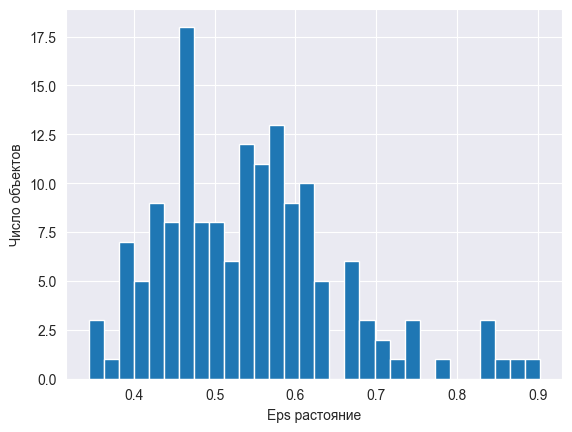

In [431]:
plt.close()
eps_dist = calucate_kn_distance(X_2_scaled,5) # считаем для каждого объекта расстояние до его 5-го ближайшего соседа
plt.hist(eps_dist, bins=30)
plt.xlabel("Eps растояние")
plt.ylabel("Число объектов")
plt.show()

In [432]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=2, metric='euclidean').fit(X)
core_sample_mask = np.zeros_like(db.labels_,dtype=bool)
core_sample_mask[db.core_sample_indices_] = True
labels = db.labels_

#число кластеров без шума если он имеется
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

labels_true = df['target']
print("Число кластеров {}".format(n_clusters_))
print("Число шумовых объектов")
